In [2]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import os
import time

Leemos las imagenes de una carpeta con cv2 y os las guardamos en un numpy array

In [147]:

def resize_and_pad(img, size, pad_color=0):
    h, w = img.shape[:2]
    sh, sw = size

    # Interpolación a usar
    interp = cv2.INTER_AREA if h > sh and w > sw else cv2.INTER_CUBIC

    # Relación de aspecto de la imagen
    aspect = w/h  

    # Cálculo de las dimensiones, manteniendo la relación de aspecto
    if aspect > 1:
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1:
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else:
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # Escalar y rellenar
    img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    img = cv2.copyMakeBorder(img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=pad_color)

    return img


def read_images(folder_path):
    images = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.jpg', '.png')):
                image_path = os.path.join(root, file)
                image = cv2.imread(image_path)
                image = resize_and_pad(image, (260, 260))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
    return images
t = time.time() 
images = read_images("../backend/fileRecognition/1604259")
print("Time: ", time.time() - t)
images = np.array(images)
images.shape


Time:  0.09705400466918945


(49, 260, 260, 3)

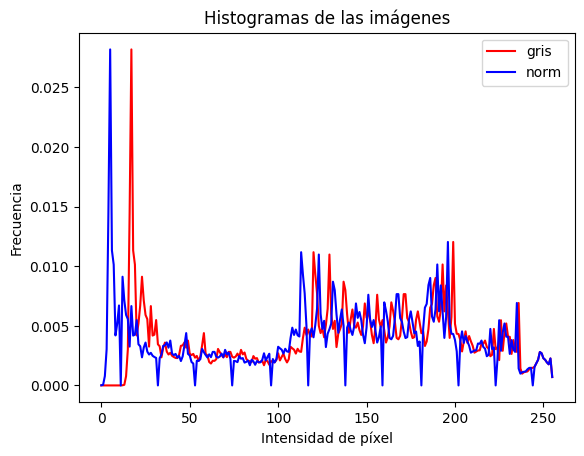

In [19]:
imagen_bgr = cv2.imread('./fileRecognition/albert/frame_1.jpg')

imagen_gris = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2GRAY)

imagen_gris_norm = cv2.normalize(imagen_gris, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)


histograma_gris = cv2.calcHist([imagen_gris], [0], None, [256], [0, 256])
histograma_gris_norm = cv2.calcHist([imagen_gris_norm], [0], None, [256], [0, 256])

histograma_gris_norm /= histograma_gris_norm.sum()
histograma_gris /= histograma_gris.sum()



# Visualizar los histogramas (opcional)
plt.plot(histograma_gris, color='r')
plt.plot(histograma_gris_norm, color='b')
plt.title('Histogramas de las imágenes')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.legend(['gris', 'norm'])
plt.show()



In [101]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(86, 87, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 84, 85, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 42, 42, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 20, 20, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 18, 18, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 9, 9, 128)        

In [102]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])        

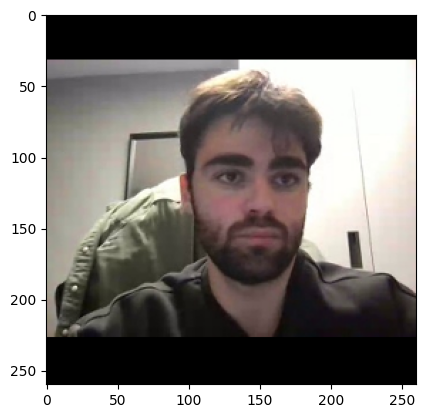

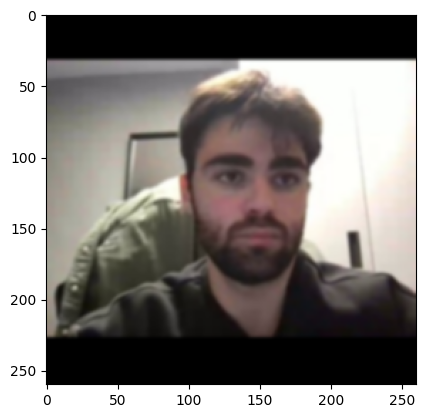

In [83]:
smoothed_image = cv2.GaussianBlur(images[5], (5, 5), 0)
smoothed_image = cv2.cvtColor(smoothed_image, cv2.COLOR_RGB2BGR)
image = cv2.cvtColor(images[5], cv2.COLOR_RGB2BGR)


plt.imshow(image)
plt.show()
plt.imshow(smoothed_image)
plt.show()

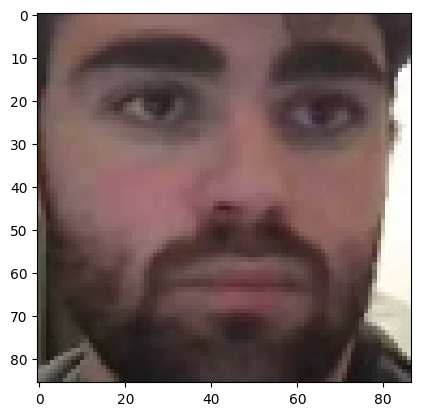

(86, 87, 3)

In [84]:
import dlib

# Cargar el detector de rostros de Dlib
detector = dlib.get_frontal_face_detector()

# Cargar la imagen

# Convertir la imagen a escala de grises

# Detectar rostros en la imagen
faces = detector(smoothed_image)

# Recorrer todas las caras detectadas

rect = faces[0]
face = image[rect.top():rect.bottom(), rect.left():rect.right()]

face.shape
    # Mostrar la silueta del rostro
plt.imshow(face)
plt.show()
    
    
face.shape



In [117]:

def detect_faces(images):
    procesed_images = []
    for image in images: 
        smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)
        smoothed_image = cv2.cvtColor(smoothed_image, cv2.COLOR_RGB2BGR)
        faces = detector(smoothed_image)
        if(len(faces) == 0):
            continue
        face = image[rect.top():rect.bottom(), rect.left():rect.right()]

        face.shape
        procesed_images.append(face)
        procesed_images.append(face)
        print(face.shape)
    procesed_images = np.array(procesed_images)
    
    return procesed_images

images_detected = detect_faces(images)

(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)


In [93]:
images_persons = read_images("../backend/fileRecognition/trainFaces")


images_persons = np.array(images_persons)
images_persons.shape

images_persons = detect_faces(images_persons)

(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86,

In [118]:
images_detected.shape, images_persons.shape

((52, 86, 87, 3), (379, 86, 87, 3))

In [151]:
all_images = np.concatenate((images_detected, images_persons[:int(len(images_persons)/4)]), axis=0)

labels = np.concatenate((np.ones(len(images_detected)), np.zeros(int(len(images_persons)/4))))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_images, labels, test_size=0.2, random_state=42)


In [152]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((116, 86, 87, 3), (30, 86, 87, 3), (116,), (30,))

In [153]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
4/4 [==============================] - 1s 168ms/step - loss: 0.0757 - acc: 0.9914 - val_loss: 0.0690 - val_acc: 1.0000
Epoch 2/30
4/4 [==============================] - 1s 148ms/step - loss: 0.0705 - acc: 0.9914 - val_loss: 0.0272 - val_acc: 1.0000
Epoch 3/30
4/4 [==============================] - 1s 140ms/step - loss: 0.0399 - acc: 0.9914 - val_loss: 0.0289 - val_acc: 1.0000
Epoch 4/30
4/4 [==============================] - 1s 134ms/step - loss: 0.0972 - acc: 0.9655 - val_loss: 0.1565 - val_acc: 0.9333
Epoch 5/30
4/4 [==============================] - 1s 181ms/step - loss: 0.1564 - acc: 0.9397 - val_loss: 0.0270 - val_acc: 1.0000
Epoch 6/30
4/4 [==============================] - 1s 146ms/step - loss: 0.0435 - acc: 0.9914 - val_loss: 0.0274 - val_acc: 1.0000
Epoch 7/30
4/4 [==============================] - 1s 165ms/step - loss: 0.0422 - acc: 0.9914 - val_loss: 0.0309 - val_acc: 1.0000
Epoch 8/30
4/4 [==============================] - 1s 182ms/step - loss: 0.0366 - acc: 0.99

In [158]:
new_images = read_images("../backend/fileRecognition/ma")
new_images = np.array(new_images)
new_images = detect_faces(new_images)


(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)
(86, 87, 3)


In [159]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


3/3 [==============================] - 0s 55ms/step
0.0


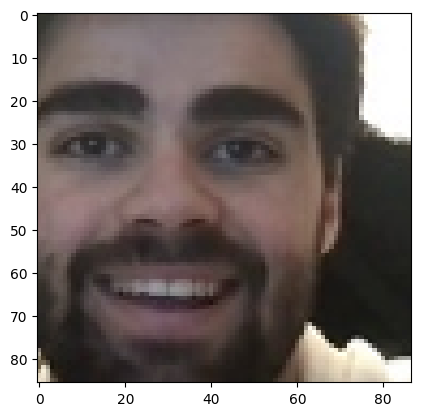

In [166]:
y_pred = model.predict(new_images)
print(y_pred.mean())


plt.imshow(new_images[10])
plt.show()

In [157]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred > 0.5))

1/1 [==============================] - 0s 74ms/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

